# Head 1st / Head 2nd / Work 1st / Work 2nd

In [1]:
import pyreadstat
import os
import gc
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

In [2]:
def call_work_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPⅡ/'
    file_path = path+'SPSS/HCCPⅡ_2ndWave_Work_3rd.sav'

    dataframe, meta = pyreadstat.read_sav(file_path)
    columns_to_drop0 = ['W22ID2', 'W22ID3']
    dataframe = dataframe.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return dataframe

In [3]:
def call_head_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPⅡ/'
    file_path = path+'SAS/HCCPⅡ_2ndwave_head_3rd.sas7bdat'

    dataframe = pd.read_sas(file_path)
    #columns_to_drop0 = ['W22ID2', 'W22ID3']
    #dataframe = dataframe.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return dataframe

In [4]:
def check_nan(input_dataframe):
    nan_values = input_dataframe.isna()
    nan_count_per_column = nan_values.sum()
    Nan_cols = []
    columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
    print("Columns with NaN values and count of NaN values:")
    for column, count in columns_with_nan.items():
        print(f"Column '{column}' has {count} NaN value(s).")
        Nan_cols.append(column)    
        
    dataframe = input_dataframe.drop(columns=Nan_cols)
    return dataframe


def equal_distirubution(dataframe, y_lst, class_idx):
    class_counts = dataframe[y_lst[class_idx]].value_counts()
    print(class_counts)
    max_samples, min_samples = class_counts.max(), class_counts.min()
    
    balanced_df = pd.DataFrame()  # Initialize an empty DataFrame to store the balanced data
    
    for class_label, count in class_counts.items():
        if count == min_samples:      # If the class count is equal to the maximum number of samples, keep all samples
            balanced_df = pd.concat([balanced_df, dataframe[dataframe[Y[class_idx]] == class_label]])
        else:
            sampled_df = dataframe[dataframe[Y[class_idx]] == class_label].sample(min_samples, replace=True)  # Randomly sample the same number of samples from the class
            balanced_df = pd.concat([balanced_df, sampled_df])
    
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the rows 
    y_balanced = balanced_df[Y[class_idx]]
    print(y_balanced.value_counts())
    X_balanced = balanced_df.drop(columns=Y)
    
    return X_balanced, y_balanced

In [5]:
def XGBoost(X_balanced, y_balanced, num_boost_round = 300):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    model = XGBClassifier(n_estimators=num_boost_round)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\tAccuracy ========> ", accuracy)
    
    #plot_importance(model, max_num_features=10)
    #plt.show()
    
    return model, X_train, X_test, y_test

In [6]:
def feature_imp1(input_model, X_train_, top_k):
    feature_importance = input_model.feature_importances_
    top_indices = np.argsort(feature_importance)[::-1][:top_k]
    top_indices = X.columns[top_indices]
    print(top_indices)
    #for feature, importance in zip(top_5_features, feature_importance[top_5_indices]):
    #    print(f"{feature}: {importance}")

    #sorted_idx = np.argsort(feature_importance)[::-1]
    #top_features = X_train_.columns[sorted_idx][:top_k]
    #print("\nTop 10 Feature Importance:")
    #for i, feature in enumerate(top_features):
    #    print(f"{i+1}. {feature}: {feature_importance[sorted_idx[i]]:.4f}")

In [7]:
def feature_imp2(input_model, max_num_features):
    plot_importance(input_model, max_num_features)
    plt.show()

In [8]:
def class_one_to_five_TO_one_to_two(dataframe, y_lst, class_idx):
    dataframe_1 = dataframe[dataframe[y_lst[class_idx]] != 3]
    dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
    #dataframe_1 = dataframe_1.drop(columns=y_lst[class_idx])
    #print(dataframe_1[y_lst[class_idx]])
    return dataframe_1

In [9]:
def erase_col_for_importance(dataframe, erase_col_lst):
    dataframe = dataframe.drop(columns=erase_col_lst)
    
    return dataframe

In [10]:
df_head = call_head_df()
df_work = call_work_df()

df_head = check_nan(df_head)

df_head.rename(columns={'C22_ID1': 'W22ID1'}, inplace=True)
df_head.rename(columns={'C22_IND1': 'W22IND1'}, inplace=True)
df_head.rename(columns={'C22_SCALE': 'W22SCALE'}, inplace=True)

df_work = check_nan(df_work)

df = pd.merge(df_work, df_head, on='W22ID1', how='inner')


Columns with NaN values and count of NaN values:
Column 'C22_SEX2' has 385 NaN value(s).
Column 'C22_SEX3' has 488 NaN value(s).
Column 'C22A01_021' has 405 NaN value(s).
Column 'C22A01_061' has 311 NaN value(s).
Column 'C22A01_062A' has 311 NaN value(s).
Column 'C22A01_062B' has 314 NaN value(s).
Column 'C22A01_07B' has 215 NaN value(s).
Column 'C22A02_08A' has 371 NaN value(s).
Column 'C22A02_08B' has 368 NaN value(s).
Column 'C22A02_08C' has 469 NaN value(s).
Column 'C22A02_08D' has 454 NaN value(s).
Column 'C22A02_08E' has 497 NaN value(s).
Column 'C22A02_08F' has 194 NaN value(s).
Column 'C22B02_06B' has 368 NaN value(s).
Column 'C22B02_08B' has 446 NaN value(s).
Column 'C22B02_10A1' has 17 NaN value(s).
Column 'C22B02_10A2' has 17 NaN value(s).
Column 'C22B02_10A3' has 17 NaN value(s).
Column 'C22B02_10A4' has 17 NaN value(s).
Column 'C22B02_10A5' has 17 NaN value(s).
Column 'C22B02_10A6' has 17 NaN value(s).
Column 'C22B02_10B1' has 18 NaN value(s).
Column 'C22B02_10B2' has 18 

In [11]:
scaler = MinMaxScaler()
#df = call_df()
#df = check_nan(df)
DF = copy.deepcopy(df)

# 1. 비공식학습 참여여부

(1)동료에 의한 코칭 및 멘토링_비공식적 학습 방법 참여 여부

(2)상사에 의한 코칭 및 멘토링_비공식적 학습 방법 참여 여부

(3)직원들 개개인 간의 지식 및 노하우 공유_비공식적 학습 방법 참여 여부

(4)사내 플랫폼을 통한 지식 공유_비공식적 학습 방법 참여 여부

(5)직무순환을 통한 학습_비공식적 학습 방법 참여 여부

In [12]:
#binary class
Y = ['W22Q15A1', 'W22Q15B1', 'W22Q15C1', 'W22Q15D1', 'W22Q15E1'] #1. 비공식학습 참여여부  => 성능 나쁨; 거의 65% 
#Y2 = ['W21Q15A2', 'W21Q15B2', 'W21Q15C2', 'W21Q15D2', 'W21Q15E2'] # 비공식학습 학습성과 

for i in range(len(Y)):
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X, y = equal_distirubution(df, Y, i)
    y=y-1
    
    #X = erase_col_for_importance(X, list2)
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W22Q15A1 

W22Q15A1
1.0    5131
2.0    4334
Name: count, dtype: int64
W22Q15A1
1.0    4334
2.0    4334
Name: count, dtype: int64
	Accuracy ========>  1.0
Index(['W22Q15A2', 'C22D04_02', 'W22Q302', 'W22Q27C', 'W22Q27D', 'W22Q27E',
       'W22Q27F', 'W22Q27G', 'W22Q28', 'W22Q29'],
      dtype='object')

 W22Q15B1 

W22Q15B1
1.0    5585
2.0    3880
Name: count, dtype: int64
W22Q15B1
1.0    3880
2.0    3880
Name: count, dtype: int64
	Accuracy ========>  1.0
Index(['W22Q15B2', 'C22D04_02', 'W22Q302', 'W22Q27C', 'W22Q27D', 'W22Q27E',
       'W22Q27F', 'W22Q27G', 'W22Q28', 'W22Q29'],
      dtype='object')

 W22Q15C1 

W22Q15C1
1.0    5920
2.0    3545
Name: count, dtype: int64
W22Q15C1
1.0    3545
2.0    3545
Name: count, dtype: int64
	Accuracy ========>  1.0
Index(['W22Q15C2', 'C22D04_02', 'W22Q302', 'W22Q27C', 'W22Q27D', 'W22Q27E',
       'W22Q27F', 'W22Q27G', 'W22Q28', 'W22Q29'],
      dtype='object')

 W22Q15D1 

W22Q15D1
2.0    5422
1.0    4043
Name: count, dtype: int64
W22Q15D1
1.0    

# 3. 자기주도학습 참여여부

(1)학원 수강료 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(2)국내 대학 등록금 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(3)국내 대학원 등록금 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(4)해외 대학원 학위과정 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

In [13]:
#Binary Class
Y = ['W22Q16A1', 'W22Q16B1', 'W22Q16C1', 'W22Q16D1']  #2. 자기주도학습 참여여부 => 성능 괜찮음: 76 ~ 92%
#Y2 = ['W21Q16A2', 'W21Q16B2', 'W21Q16C2', 'W21Q16D2']  #자기주도학습 학습성과

In [14]:
for i in range(len(Y)):
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X, y = equal_distirubution(df, Y, i)
    
    y=y-1
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W22Q16A1 

W22Q16A1
2.0    6560
1.0    2905
Name: count, dtype: int64
W22Q16A1
2.0    2905
1.0    2905
Name: count, dtype: int64
	Accuracy ========>  1.0
Index(['W22Q16A2', 'C22D04_02', 'W22Q261', 'W22Q27B', 'W22Q27C', 'W22Q27D',
       'W22Q27E', 'W22Q27F', 'W22Q27G', 'W22Q28'],
      dtype='object')

 W22Q16B1 

W22Q16B1
2.0    9142
1.0     323
Name: count, dtype: int64
W22Q16B1
1.0    323
2.0    323
Name: count, dtype: int64
	Accuracy ========>  1.0
Index(['W22Q16B2', 'C22D04_02', 'W22Q261', 'W22Q27B', 'W22Q27C', 'W22Q27D',
       'W22Q27E', 'W22Q27F', 'W22Q27G', 'W22Q28'],
      dtype='object')

 W22Q16C1 

W22Q16C1
2.0    9292
1.0     173
Name: count, dtype: int64
W22Q16C1
2.0    173
1.0    173
Name: count, dtype: int64
	Accuracy ========>  1.0
Index(['W22Q16C2', 'C22D04_02', 'W22Q261', 'W22Q27B', 'W22Q27C', 'W22Q27D',
       'W22Q27E', 'W22Q27F', 'W22Q27G', 'W22Q28'],
      dtype='object')

 W22Q16D1 

W22Q16D1
2.0    9359
1.0     106
Name: count, dtype: int64
W22Q16D1
2.0    1

# 5. 조직신뢰 

(1)직원들에게 회사 사정을 소상하게 알려준다

(2)상급자에게 의견을 자유롭게 낼 수 있다

(3)부서간의 커뮤니케이션이 잘 되는 편이다

(4)동료들 간에 서로 신뢰한다

(5)평가 및 보상이 공정하게 이루어진다

(6)경영진은 모든 면에서 믿고 따라갈 만하다

2개로 줄임: Class (1, 2) ====> 1 & (4, 5) ====> 2 & (3) ====> 삭제 

In [15]:
#Multi Class - 5
Y = ['W22Q24A', 'W22Q24B', 'W22Q24C', 'W22Q24D', 'W22Q24E', 'W22Q24F']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W22Q24A 

W22Q24A
2    3620
1    2540
Name: count, dtype: int64
W22Q24A
2    2540
1    2540
Name: count, dtype: int64
	Accuracy ========>  0.8464566929133859
Index(['W22Q25B', 'W22Q23A', 'W22Q23B', 'W22Q25A', 'C22C01_01', 'W22Q25E',
       'W22Q23D', 'C22C03_05F', 'C22B02_13', 'W22Q23C'],
      dtype='object')

 W22Q24B 

W22Q24B
2    4206
1    1959
Name: count, dtype: int64
W22Q24B
2    1959
1    1959
Name: count, dtype: int64
	Accuracy ========>  0.8290816326530612
Index(['W22Q25B', 'W22Q25A', 'W22Q25D', 'W22Q23A', 'W22Q23B', 'C22B02_05C4',
       'W22Q26C', 'C22B03_01A', 'W22Q22C', 'C22C03_02'],
      dtype='object')

 W22Q24C 

W22Q24C
2    3909
1    1930
Name: count, dtype: int64
W22Q24C
2    1930
1    1930
Name: count, dtype: int64
	Accuracy ========>  0.8652849740932642
Index(['W22Q23B', 'W22Q23A', 'W22Q25E', 'W22Q25D', 'C22C03_04C', 'C22C03_04G',
       'W22Q26A', 'W22Q22F', 'C22C01_05', 'C22D02_02E'],
      dtype='object')

 W22Q24D 

W22Q24D
2    4636
1    1306
Name: count,

# 6. 직무만족 

(1)현재 하고 있는 일의 내용에 만족한다

(2)현재 받고 있는 임금에 만족한다

(3)현재 직장의 인간관계에 만족한다

하고 있는 일에 대한 전반적 만족도

In [16]:
Y = ['W22Q26A', 'W22Q26B', 'W22Q26C', 'W22Q261']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W22Q26A 

W22Q26A
2    5246
1    1179
Name: count, dtype: int64
W22Q26A
2    1179
1    1179
Name: count, dtype: int64
	Accuracy ========>  0.8305084745762712
Index(['W22Q27D', 'C22C01_06B1', 'W22Q25A', 'W22Q24F', 'W22Q25G', 'W22Q22A',
       'C22D01_0311', 'C22D02_02E', 'C22D03_01A1', 'C22B02_13'],
      dtype='object')

 W22Q26B 

W22Q26B
2    3420
1    2645
Name: count, dtype: int64
W22Q26B
2    2645
1    2645
Name: count, dtype: int64
	Accuracy ========>  0.8638941398865785
Index(['W22Q24E', 'W22Q23A', 'W22Q25K', 'W22Q27D', 'C22_KSIC1', 'W22Q23D',
       'W22Q27A', 'C22D02_02C', 'C22B02_05G3', 'C22D01_041'],
      dtype='object')

 W22Q26C 

W22Q26C
2    5656
1    1013
Name: count, dtype: int64
W22Q26C
1    1013
2    1013
Name: count, dtype: int64
	Accuracy ========>  0.8201970443349754
Index(['W22Q24D', 'W22Q25D', 'W22Q25G', 'W22Q22F', 'W22Q25K', 'C22C02_04A',
       'W22Q082C', 'W22Q082E', 'W22Q25E', 'C22A02_04'],
      dtype='object')

 W22Q261 

W22Q261
2    4300
1    1012
Nam

# 7. 조직몰입 

(1) 나는 조금이라도 좋은 조건을 제시하는 회사가 있으면 옮길 것을 고려해 보고 있다

(2) 나는 이 회사의 문제를 내 문제처럼 느낀다

(3) 만약 내가 이 회사를 떠나기로 결정한다면 내 인생의 너무 많은 것을 잃게 될 것이다

(4) 이 회사는 내가 충성할 만한 가치가 있다

In [17]:
Y = ['W22Q27A', 'W22Q27B', 'W22Q27C', 'W22Q27D']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr, _, _ = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W22Q27A 

W22Q27A
2    3745
1    2498
Name: count, dtype: int64
W22Q27A
2    2498
1    2498
Name: count, dtype: int64
	Accuracy ========>  0.798
Index(['W22Q261', 'W22IND1_x', 'W22Q26B', 'C22C02_01B2', 'C22D02_01I4',
       'W22Q27E', 'W22Q081C', 'C22D03_01D1', 'C22D02_04F1', 'C22D02_02C'],
      dtype='object')

 W22Q27B 

W22Q27B
2    4487
1    1607
Name: count, dtype: int64
W22Q27B
2    1607
1    1607
Name: count, dtype: int64
	Accuracy ========>  0.776049766718507
Index(['W22Q26A', 'W22Q24F', 'W22Q10B', 'W22Q25F', 'W22Q26C', 'W22Q24A',
       'C22C03_05D', 'W22DQ03', 'W22Q09H', 'W22Q03B'],
      dtype='object')

 W22Q27C 

W22Q27C
1    3542
2    2507
Name: count, dtype: int64
W22Q27C
2    2507
1    2507
Name: count, dtype: int64
	Accuracy ========>  0.8045862412761715
Index(['W22Q24F', 'W22Q23B', 'C22D02_04C1', 'W22Q26B', 'W22Q25B', 'W22Q25D',
       'W22Q26A', 'W22Q01A', 'W22Q24A', 'W22Q23C'],
      dtype='object')

 W22Q27D 

W22Q27D
2    3413
1    1951
Name: count, dtype: int6

# 8. 번아웃 

(6) 나는 현재 업무로 인해 무력감이나 피곤함을 느낄 때가 많아졌다

In [18]:
imp_lst1 = ['W22Q27E', 'W22Q27G', 'W22Q261', 'W22Q26A', 'W22Q27A']
imp_lst2 = ['W22ID1', 'W22Q04', 'W22Q27G', 'W22DQ02A', 'W22Q27E']

In [19]:
Y = ['W22Q27F']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    #X = erase_col_for_importance(X, imp_lst1)
    
    model, x_tr, x_tst, y_tst = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=15)


 W22Q27F 

W22Q27F
2    3132
1    2658
Name: count, dtype: int64
W22Q27F
2    2658
1    2658
Name: count, dtype: int64
	Accuracy ========>  0.8355263157894737
Index(['W22Q27E', 'W22Q26A', 'W22Q27G', 'C22B03_01B', 'C22B02_05G3', 'W22Q27A',
       'W22Q261', 'W22IND1_x', 'C22A02_05', 'C22B03_06G', 'W22Q09H', 'W22Q301',
       'C22C02_01D1', 'C22D03_01E1', 'C22_TYPE'],
      dtype='object')


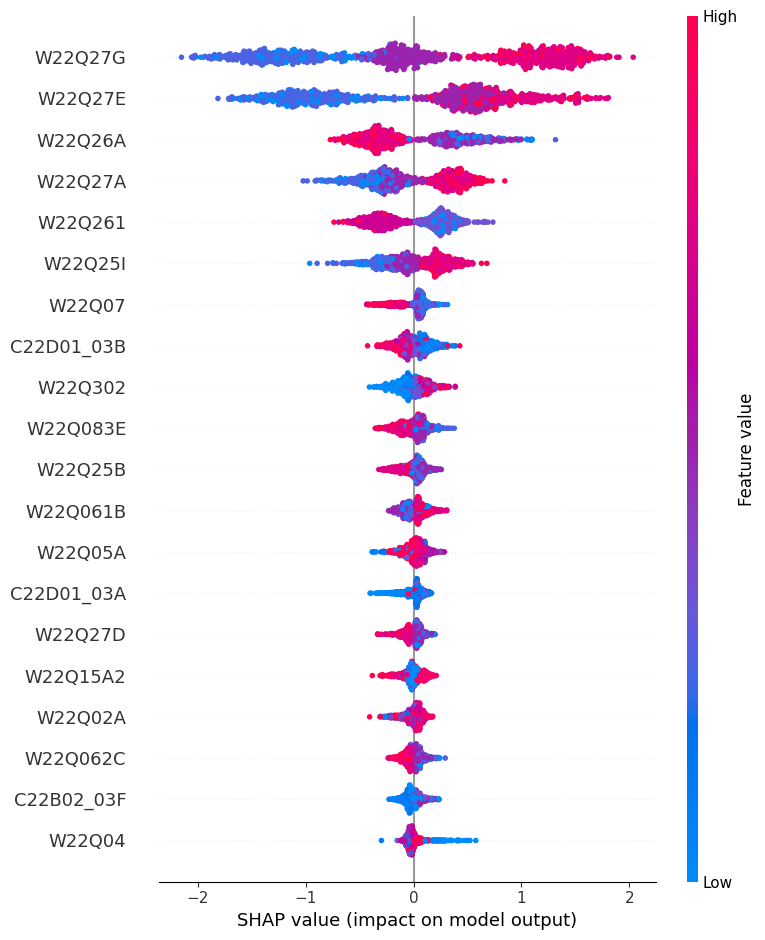

In [20]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)

# Visualize SHAP values
shap.summary_plot(shap_values, x_tst)

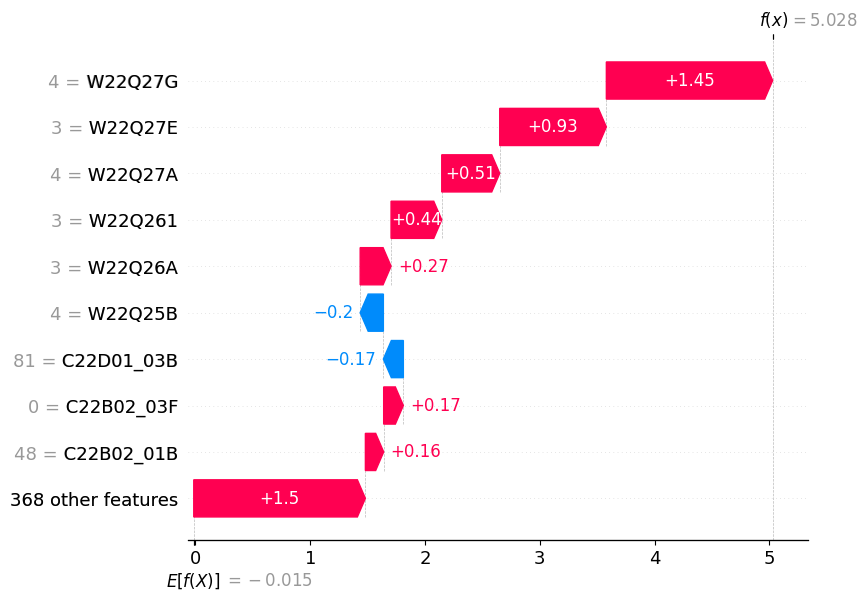

In [21]:
sv = explainer(X)
shap.plots.waterfall(sv[0])

In [22]:
import shap

shap.initjs()
sv = explainer(X)
shap.plots.force(sv[0])

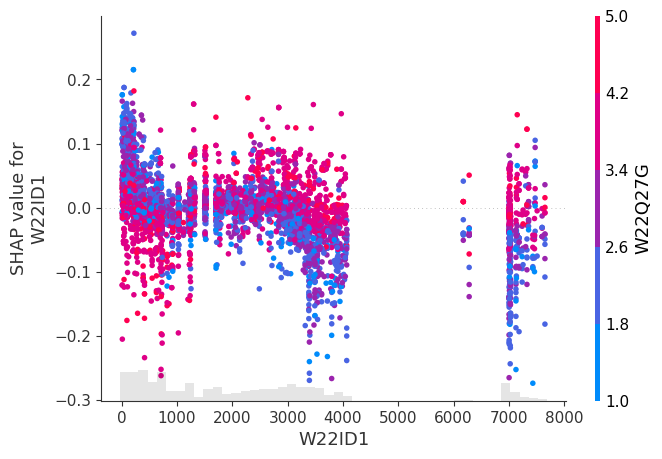

In [24]:
shap.plots.scatter(sv[:,"W22ID1"], color=sv)

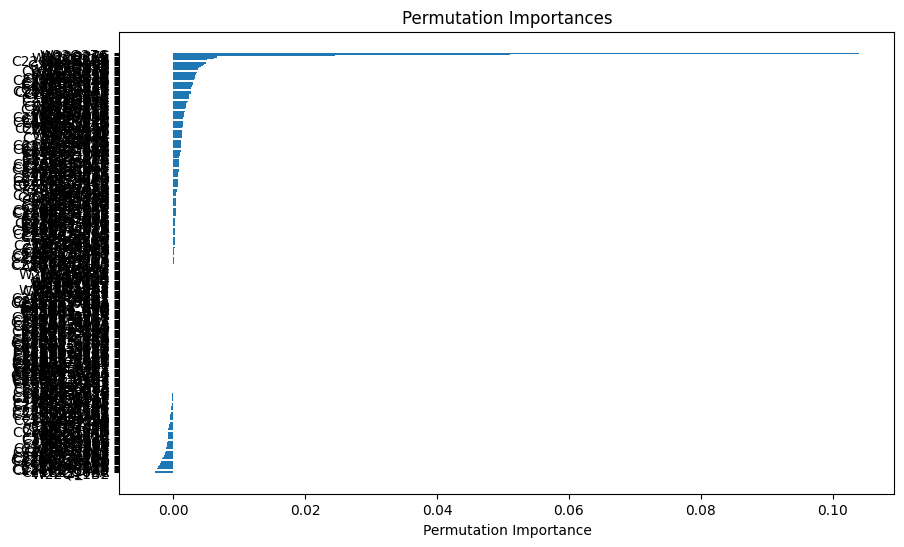

In [25]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_tst, y_tst, n_repeats=10, random_state=42)

feature_names = X.columns

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances')
plt.show()

In [26]:
feature_names[sorted_idx][-10:]

Index(['W22Q07', 'W22Q261', 'W22Q10A', 'C22C02_01D2', 'W22Q27A', 'W22Q25I',
       'W22Q061B', 'W22Q26A', 'W22Q27E', 'W22Q27G'],
      dtype='object')

# Feature importance랑 Permutation importance는 유사함 (sorting)

# SMOTE -> data augmentation based on synthetic dataset

justification: 심하게 skewed 된 학습데이터만 증강 기법을 써서 올림 => test 데이터 자체는 그대로 유지

Overfitting 이 보이는 시점이 있음 => 실제로 어느정도는 도움이 된다는 뜻

In [ ]:
from xgboost import XGBClassifier, plot_importance
scaler = MinMaxScaler()
from imblearn.over_sampling import SMOTE

X = df_no_nan.drop(columns=[Y[target_idx]])
y = df_no_nan[Y[target_idx]] 
X_normalized = scaler.fit_transform(X)
df = pd.DataFrame(X_normalized, columns=X.columns)

print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)

print(y_resampled.value_counts())

In [ ]:
y_resampled = y_resampled - 1

X_train, X_test, y_train, y_test = train_test_split(balanced_df, y_resampled, test_size=0.2, random_state=42)

num_boost_round = 300  
model = XGBClassifier(n_estimators=num_boost_round)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=True)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)